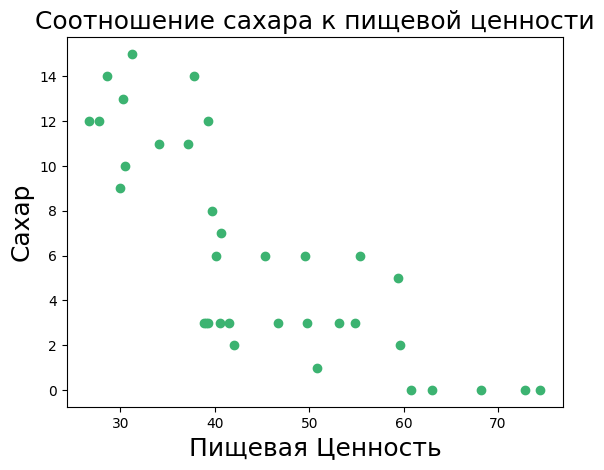

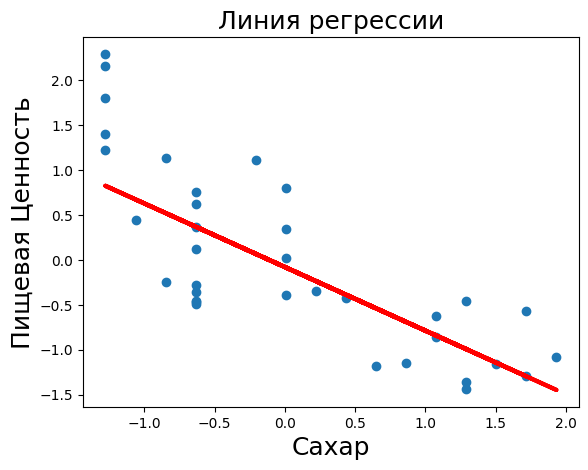

*** Коэффициенты регрессии ***
Наклон линии(направление зависимости) =  -0.7075291577597057
Изменение высоты относительно оси X) =  -0.0801370262590205
Метрики качества итд
Коэффициент детерминаци для обучающей выборки r^2 = 0.566
Коэффициент детерминаци для тестовой выборки r^2 = 0.659
Ошибка относительно среднего значения y = 0.22974368115298707
Регрессионная квадратичная сумма 5.789713943211035
Квадратичная сумма ошибки 4.085495641115236
Общая квадратичная сумма 9.87520958432627
F-критерий 7.0856934528886075
Коэффициент (№ переменной) 0: t-критерий = -6.322


In [5]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import sem

# Загрузка данных
data = pd.read_csv('hlopya.csv')

# Ограничение на строки с 40 по 75
data = data.iloc[40:75]  # Выбираем строки с 40 по 75

# Далее ваш код остается без изменений
str_cols = data.select_dtypes(include=['object']).columns
df = data.drop(str_cols, axis=1)
fvalue = df['Сахар, г.']
target_value = df['Пищевая ценность']

# Визуализация
plt.scatter(target_value, fvalue, color='mediumseagreen')
plt.xlabel('Пищевая Ценность', fontsize=18)
plt.ylabel('Сахар', fontsize=18)
plt.title('Соотношение сахара к пищевой ценности', fontsize=18)
plt.show()

# Объединение и масштабирование
df = pd.merge(fvalue, target_value, right_index=True, left_index=True)
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))

# Разделение данных
X = df.iloc[:, 0:1]
y = df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Визуализация линии регрессии
plt.scatter(X, y)
plt.xlabel('Сахар', fontsize=18)
plt.ylabel('Пищевая Ценность', fontsize=18)
plt.plot(X, model.predict(X), color='red', linewidth=3)
plt.title('Линия регрессии', fontsize=18)
plt.show()

# Оценка модели
mse = mean_squared_error(y_pred, y_test)
mean_y = np.mean(y_test)
SSR = np.sum((y_pred - mean_y) ** 2)
SSE = np.sum((y_test - y_pred) ** 2)
SST = SSR + SSE
n = X_test.shape[0]
p = X_test.shape[1]
F = (SSR / p) / (SSE / (n - p - 1))

# Вывод результатов
print('*** Коэффициенты регрессии ***')
print('Наклон линии(направление зависимости) = ', *model.coef_)
print('Изменение высоты относительно оси X) = ', model.intercept_)
print('Метрики качества итд')
print('Коэффициент детерминаци для обучающей выборки r^2 =', round(model.score(X_train, y_train), 3))
print('Коэффициент детерминаци для тестовой выборки r^2 =', round(model.score(X_test, y_test), 3))
print('Ошибка относительно среднего значения y =', mean_y)
print('Регрессионная квадратичная сумма', SSR)
print('Квадратичная сумма ошибки', SSE)
print('Общая квадратичная сумма', SST)
print('F-критерий', F)

for i, coef in enumerate(model.coef_):
    X_i = X_test.iloc[:, i]
    se_b_i = np.sqrt(mse / (n - p - 1)) / np.sqrt(np.sum((X_i - np.mean(X_i)) ** 2))
    t_stat = coef / se_b_i
    print(f"Коэффициент (№ переменной) {i}: t-критерий = {t_stat:.3f}")